In [1]:
import numpy as np
import pandas as pd
import textstat
import nltk
import re
from scipy.stats import bootstrap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
News_df = pd.read_pickle('News_df.pkl')
News_df.reset_index(drop = True, inplace = True)
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  
0                                                    None              None  
1                                                    None              None  
2                                                    None              None  
3                                                    None              None  
4                                                    None              None  
...                                                   ...               ...  
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016  
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016  
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016  
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016  
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016  

[128930 rows x 5 columns]

In [3]:
News_df["id"] = News_df.index + 1
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

            id  
0            1  
1            2  
2            3  
3            4  
4            5  
...        ...  
128925  128926  
128926  128927  
128927  128928  
128928  128929  
128929  128930  

[128930 rows x 6 columns]

In [4]:
News_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128930 entries, 0 to 128929
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     128930 non-null  object
 1   real     128930 non-null  int64 
 2   subject  128930 non-null  object
 3   title    128930 non-null  object
 4   date     128930 non-null  object
 5   id       128930 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 5.9+ MB


In [5]:
News_df['text'][0][:500]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a gr'

In [6]:
News_df.head()

text  real subject title  \
0  Donald Trump just couldn t wish all Americans ...     0    None  None   
1  House Intelligence Committee Chairman Devin Nu...     0    None  None   
2  On Friday, it was revealed that former Milwauk...     0    None  None   
3  Pope Francis used his annual Christmas Day mes...     0    None  None   
4  The number of cases of cops brutalizing and ki...     0    None  None   

   date  id  
0  None   1  
1  None   2  
2  None   3  
3  None   4  
4  None   5

In [7]:
'''
Most English language reading scores avaliabe in textstat were used. One exception was SMOG, which requires more content 
than many of the articles had. 
'''

'\nMost English language reading scores avaliabe in textstat were used. One exception was SMOG, which requires more content \nthan many of the articles had. \n'

In [8]:
sc_scorers = [
    textstat.flesch_reading_ease, 
    textstat.flesch_kincaid_grade,
    textstat.coleman_liau_index,
    textstat.automated_readability_index,
    textstat.dale_chall_readability_score,
    textstat.difficult_words,
    textstat.linsear_write_formula,
    textstat.gunning_fog, 
    textstat.text_standard,
    textstat.syllable_count,
    textstat.lexicon_count,
    textstat.sentence_count,
    textstat.char_count,
    textstat.letter_count,
    textstat.polysyllabcount,
    textstat.monosyllabcount
    ]
len(sc_scorers)

16

In [9]:
column_names = [
    'fe_score', 
    'fk_score',
    'cl_score',
    'ari_score',
    'dc_score',
    'dw_score',
    'ls_score',
    'gf_score',
    'std_score',
    'syllable_count',
    'word_count',
    'sentence_count',
    'char_count',
    'letter_count',
    'polysyllab_count',
    'monosyllab_count'
    ]
len(column_names)

16

In [10]:
def newsscore(scorer, column_name):
    x = len(News_df)
    sclist = []
    for i in range(x):
            scvar = scorer(News_df['text'][i])
            sclist.append(scvar)
    News_df[column_name] = sclist


In [11]:
start_time = time.time()
y = len(column_names)
for i in range(y):
    newsscore(sc_scorers[i], column_names[i])
print("--- %s seconds ---" % (time.time() - start_time))

--- 2652.071486234665 seconds ---


In [12]:
News_df.head()

text  real subject title  \
0  Donald Trump just couldn t wish all Americans ...     0    None  None   
1  House Intelligence Committee Chairman Devin Nu...     0    None  None   
2  On Friday, it was revealed that former Milwauk...     0    None  None   
3  Pope Francis used his annual Christmas Day mes...     0    None  None   
4  The number of cases of cops brutalizing and ki...     0    None  None   

   date  id  fe_score  fk_score  cl_score  ari_score  ...  ls_score  gf_score  \
0  None   1     71.14       7.6      9.05        9.8  ...     11.80      8.91   
1  None   2     62.78       8.7     11.95       11.6  ...     12.40      9.91   
2  None   3     63.59       8.4     11.02       11.0  ...     14.75      9.20   
3  None   4     67.08       9.1      8.59       10.5  ...     12.20     10.97   
4  None   5     68.60       8.5      8.53        9.8  ...     11.60     10.24   

             std_score  syllable_count word_count  sentence_count  char_count  \
0    8th and 9th grade             692        492              29        2378   
1  11th and 12th grade             471        305              18        1590   
2    8th and 9th grade             845        579              36        2998   
3  10th and 11th grade             574        420              20        1913   
4    8th and 9th grade             423        312              16        1421   

   letter_count  polysyllab_count  monosyllab_count  
0          2257                59               362  
1          1551                39               193  
2          2852                73               415  
3          1873                34               313  
4          1387                25               235  

[5 rows x 22 columns]

In [13]:
News_df['clean_text'] = News_df['text'].str.replace('[^a-zA-Z]',' ').str.lower()
News_df

C:\Users\danie\AppData\Local\Temp\ipykernel_1960\429811828.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  News_df['clean_text'] = News_df['text'].str.replace('[^a-zA-Z]',' ').str.lower()


text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

            id  fe_score  fk_score  cl_score  ari_score  ...  gf_score  \
0            1     71.14       7.6      9.05        9.8  ...      8.91   
1            2     62.78       8.7     11.95       11.6  ...      9.91   
2            3     63.59       8.4     11.02       11.0  ...      9.20   
3            4     67.08       9.1      8.59       10.5  ...     10.97   
4            5     68.60       8.5      8.53        9.8  ...     10.24   
...        ...       ...       ...       ...        ...  ...       ...   
128925  128926     44.98      13.5     12.42       15.9  ...     15.11   
128926  128927     65.25       9.8      9.17       11.9  ...     12.35   
128927  128928     51.62      13.0     11.15       16.0  ...     14.05   
128928  128929     65.25       9.8     10.22       12.8  ...     11.31   
128929  128930     61.06       9.4     10.62       11.3  ...     10.33   

                  std_score  syllable_count  word_count sentence_count  \
0         8th and 9th grade             692         492             29   
1       11th and 12th grade             471         305             18   
2         8th and 9th grade             845         579             36   
3       10th and 11th grade             574         420             20   
4         8th and 9th grade             423         312             16   
...                     ...             ...         ...            ...   
128925  15th and 16th grade             838         522             20   
128926   9th and 10th grade             427         297             13   
128927  15th and 16th grade            6345        4164            149   
128928   9th and 10th grade             649         456             20   
128929    8th and 9th grade            1304         872             47   

        char_count  letter_count  polysyllab_count  monosyllab_count  \
0             2378          2257                59               362   
1             1590          1551                39               193   
2             2998          2852                73               415   
3             1913          1873                34               313   
4    

In [14]:
News_df['std_score'].unique()

array(['8th and 9th grade', '11th and 12th grade', '10th and 11th grade',
       '7th and 8th grade', '13th and 14th grade', '12th and 13th grade',
       '9th and 10th grade', '15th and 16th grade', '14th and 15th grade',
       '6th and 7th grade', '5th and 6th grade', '16th and 17th grade',
       '17th and 18th grade', '4th and 5th grade', '20th and 21st grade',
       '18th and 19th grade', '35th and 36th grade', '3rd and 4th grade',
       '19th and 20th grade', '-1th and 0th grade', '45th and 46th grade',
       '22nd and 23rd grade', '32nd and 33rd grade',
       '49th and 50th grade', '25th and 26th grade',
       '90th and 91st grade', '43rd and 44th grade', '1st and 2nd grade',
       '0th and 1st grade', '55th and 56th grade', '21st and 22nd grade',
       '23rd and 24th grade', '2nd and 3rd grade', '33rd and 34th grade',
       '71st and 72nd grade', '24th and 25th grade',
       '-3th and -2th grade', '38th and 39th grade',
       '114th and 115th grade', '291st and 292nd

In [15]:
x = len(News_df['std_score'])
num_list = []
for i in range(x):
    num = re.findall(r'\d+', News_df['std_score'][i])
    num_list.append(num)
len(num_list)

128930

In [16]:
fin_list = []
for i in num_list:
    x = int(i[0])
    y = int(i[1])
    fin = (x+y)/2
    fin_list.append(fin)
len(fin_list)

128930

In [17]:
News_df['std_score_num'] = fin_list
News_df.head()

text  real subject title  \
0  Donald Trump just couldn t wish all Americans ...     0    None  None   
1  House Intelligence Committee Chairman Devin Nu...     0    None  None   
2  On Friday, it was revealed that former Milwauk...     0    None  None   
3  Pope Francis used his annual Christmas Day mes...     0    None  None   
4  The number of cases of cops brutalizing and ki...     0    None  None   

   date  id  fe_score  fk_score  cl_score  ari_score  ...  \
0  None   1     71.14       7.6      9.05        9.8  ...   
1  None   2     62.78       8.7     11.95       11.6  ...   
2  None   3     63.59       8.4     11.02       11.0  ...   
3  None   4     67.08       9.1      8.59       10.5  ...   
4  None   5     68.60       8.5      8.53        9.8  ...   

             std_score  syllable_count  word_count  sentence_count char_count  \
0    8th and 9th grade             692         492              29       2378   
1  11th and 12th grade             471         305              18       1590   
2    8th and 9th grade             845         579              36       2998   
3  10th and 11th grade             574         420              20       1913   
4    8th and 9th grade             423         312              16       1421   

   letter_count  polysyllab_count  monosyllab_count  \
0          2257                59               362   
1          1551                39               193   
2          2852                73               415   
3          1873                34               313   
4          1387                25               235   

                                          clean_text  std_score_num  
0  donald trump just couldn t wish all americans ...            8.5  
1  house intelligence committee chairman devin nu...           11.5  
2  on friday  it was revealed that former milwauk...            8.5  
3  pope francis used his annual christmas day mes...           10.5  
4  the number of cases of cops brutalizing and ki...            8.5  

[5 rows x 24 columns]

In [18]:
rslt_df1 = News_df[News_df['real'] == 1]
rslt_df1['std_score_num'].describe()

count    56363.000000
mean        11.821310
std          2.436246
min          0.500000
25%         10.500000
50%         11.500000
75%         13.500000
max         67.500000
Name: std_score_num, dtype: float64

In [19]:
rslt_df1['word_count'].describe()

count    56363.000000
mean       474.350762
std        477.113800
min          0.000000
25%        166.000000
50%        375.000000
75%        628.000000
max      14432.000000
Name: word_count, dtype: float64

In [20]:
rslt_wrd = News_df[News_df['word_count'] == 0]
rslt_wrd

text  real       subject  \
30220     🙂     0          None   
93002           1  politicsNews   
116372          0      politics   
116490          0      politics   
116639          0      politics   
...     ...   ...           ...   
127265          0     left-news   
127275          0     left-news   
127276          0     left-news   
127306          0     left-news   
127322          0     left-news   

                                                    title            date  \
30220                                                None            None   
93002                      Graphic: Supreme Court roundup  June 16, 2016    
116372  TAKE OUR POLL: Who Do You Think President Trum...    May 10, 2017   
116490  Joe Scarborough BERATES Mika Brzezinski Over “...    Apr 26, 2017   
116639  WATCH TUCKER CARLSON Scorch Sanctuary City May...     Apr 6, 2017   
...                                                   ...             ...   
127265  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...    Apr 27, 2015   
127275  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...    Apr 25, 2015   
127276  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...    Apr 25, 2015   
127306  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...    Apr 14, 2015   
127322  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...    Apr 12, 2015   

            id  fe_score  fk_score  cl_score  ari_score  ...  \
30220    30221    206.84     -15.7    -15.81        0.0  ...   
93002    93003    206.84     -15.7    -15.81        0.0  ...   
116372  116373    206.84     -15.7    -15.81        0.0  ...   
116490  116491    206.84     -15.7    -15.81        0.0  ...   
116639  116640    206.84     -15.7    -15.81        0.0  ...   
...        ...       ...       ...       ...        ...  ...   
127265  127266    206.84     -15.7    -15.81        0.0  ...   
127275  127276    206.84     -15.7    -15.81        0.0  ...   
127276  127277    206.84     -15.7    -15.81        0.0  ...   
127306  127307    206.84     -15.7    -15.81        0.0  ...   
127322  127323    206.84     -15.7    -15.81        0.0  ...   

                 std_score  syllable_count  word_count  sentence_count  \
30220   -1th and 0th grade               0           0               1   
93002   -1th and 0th grade               0           0               1   
116372  -1th and 0th grade               0           0               1   
116490  -1th and 0th grade               0           0               1   
116639  -1th and 0th grade               0           0               1   
...                    ...             ...         ...             ...   
127265  -1th and 0th grade               0           0               1   
127275  -1th and 0th grade               0           0               1   
127276  -1th and 0th grade               0           0               1   
127306  -1th and 0th grade               0           0               1   
127322  -1th and 0th grade               0           0               1   

       char_count  letter_count  polysyllab_count  monosyllab_count  \
30220           1             0                 0                 0   
93002           0             0                 0                 0   
116372          0             0                 0                 0   
116490          0             0                 0                 0   
116639          0             0                 0                 0   
...           ...           ...               ...               ...   
127265          0             0                 0                 0   
127275          0             0                 0                 0   
127276          0             0                 0                 0   
127306          0             0                 0                 0   
127322          0             0                 0                 0   

        clean_text  std_score_num  
30220                         0.5  
93002                         0.5  
116372                        0.5  
116490

In [21]:
News_df = News_df[News_df['word_count'] != 0]

News_df['word_count'].describe()

count    128298.000000
mean        431.300963
std         527.336972
min           1.000000
25%         122.000000
50%         339.000000
75%         539.000000
max       24135.000000
Name: word_count, dtype: float64

In [22]:
low_wrd = News_df[News_df['word_count']<40]
z = len(low_wrd)
low_wrd.reset_index(inplace = True, drop = True)
for i in range(z):
    print(low_wrd['text'][i])

There s not much to say here. GIPHY killed it with this one: When someone goes on a rant but you have receipts. https://t.co/axe58zCeJL #debatenight #Debates2016 pic.twitter.com/KTgdWAvaAb  GIPHY (@giphy) September 27, 2016Photo by Justin Sullivan/Getty Images
https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/
White House Press Secretary Sean Spicer appeared on Lou Dobbs tonight to give the first set of explanatory points around the President s decision to fire FBI Director James Comey:
White House Press Secretary Sean Spicer appeared on Lou Dobbs tonight to give the first set of explanatory points around the President s decision to fire FBI Director James Comey:
Enjoy:
Enjoy:
Enjoy:
Enjoy:
FOX NEWS ALERT: New details on @adamhousley s report; sources telling him the official who  unmasked  Trump associates is  very high up  pic.twitter.com/nowhUIIDSb  FOX & friends (@foxandfriends) April 3, 

In [23]:
'''
These don't seem like great articles, not all are terrible, but the vast majority are, and thus I am going to set a first pass
minimum of 40 words. Also I need to take another look at duplicates. 
'''

"\nThese don't seem like great articles, not all are terrible, but the vast majority are, and thus I am going to set a first pass\nminimum of 40 words. Also I need to take another look at duplicates. \n"

In [24]:
News_df = News_df[News_df['word_count']>40]

In [25]:
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

            id  fe_score  fk_score  cl_score  ari_score  ...  \
0            1     71.14       7.6      9.05        9.8  ...   
1            2     62.78       8.7     11.95       11.6  ...   
2            3     63.59       8.4     11.02       11.0  ...   
3            4     67.08       9.1      8.59       10.5  ...   
4            5     68.60       8.5      8.53        9.8  ...   
...        ...       ...       ...       ...        ...  ...   
128925  128926     44.98      13.5     12.42       15.9  ...   
128926  128927     65.25       9.8      9.17       11.9  ...   
128927  128928     51.62      13.0     11.15       16.0  ...   
128928  128929     65.25       9.8     10.22       12.8  ...   
128929  128930     61.06       9.4     10.62       11.3  ...   

                  std_score  syllable_count  word_count  sentence_count  \
0         8th and 9th grade             692         492              29   
1       11th and 12th grade             471         305              18   
2         8th and 9th grade             845         579              36   
3       10th and 11th grade             574         420              20   
4         8th and 9th grade             423         312              16   
...                     ...             ...         ...             ...   
128925  15th and 16th grade             838         522              20   
128926   9th and 10th grade             427         297              13   
128927  15th and 16th grade            6345        4164             149   
128928   9th and 10th grade             649         456              20   
128929    8th and 9th grade            1304         872              47   

       char_count  letter_count  polysyllab_count  monosyllab_count  \
0            2378          2257                59               362   
1            1590          1551                39               193   
2            2998          2852                73               415   
3            1913          1873                34               313   
4            1421          1387                25               235   
...           ...           ...               .

In [26]:
'''
Going to look at this again for articles with under 60 but greater than 40. These seem fine so I like the cutoff. I still have 
to do something about these duplicates though
'''

'\nGoing to look at this again for articles with under 60 but greater than 40. These seem fine so I like the cutoff. I still have \nto do something about these duplicates though\n'

In [27]:
low_wrd2 = News_df[News_df['word_count']<60]
z = len(low_wrd2)
low_wrd2.reset_index(inplace = True, drop = True)
for i in range(z):
    print(low_wrd2['text'][i])

CNN Reports   Three members of the legal team known to have been hired so far by special counsel Robert Mueller to handle the Russia investigation have given political donations almost exclusively to Democrats, according to a CNN analysis of Federal Election Commission records.
CNN Reports   Three members of the legal team known to have been hired so far by special counsel Robert Mueller to handle the Russia investigation have given political donations almost exclusively to Democrats, according to a CNN analysis of Federal Election Commission records.
Hillary Clinton continues on the path to complete and total denial. #CODECON 2017 included a blah, blah, blah session by Clinton. She spews ridiculous victimhood it s embarrassing!  Nobody said don t do this https://www.youtube.com/watch?v=9_nKOL4h0iUThis woman needs to go off into the woods for another walk.
Alan Dershowitz schools his former student Jeffrey Tobin on whether the subject matter is a crime in relation to Jared Kushner: I d

In [28]:
News_df['word_count'].value_counts()

            

60      666
56      490
84      481
52      386
67      338
       ... 
1920      1
3556      1
2823      1
5049      1
3909      1
Name: word_count, Length: 2846, dtype: int64

In [29]:
News_df['sentence_count'].value_counts()

3      5456
4      4909
16     3817
14     3802
15     3757
       ... 
222       1
520       1
207       1
474       1
315       1
Name: sentence_count, Length: 351, dtype: int64

In [30]:
News_df['sentence_count'].min()

1

In [31]:
News_df[News_df['sentence_count']==1].head(30)

text  real subject title  \
9709   Senator John McCain was overheard saying a sic...     0    None  None   
10354  CNN Reports   Three members of the legal team ...     0    None  None   
10355  CNN Reports   Three members of the legal team ...     0    None  None   
11463  In light of Republican failure to pass the Ame...     0    None  None   
11464  In light of Republican failure to pass the Ame...     0    None  None   
11465  In light of Republican failure to pass the Ame...     0    None  None   
12257  Some of the key regulations are thought to be ...     0    None  None   
12258  Some of the key regulations are thought to be ...     0    None  None   
13067  In crisp lawyerly style, Trey Gowdy makes good...     0    None  None   
13394  Members Of The Intelligence Committee Simply D...     0    None  None   
13395  Members Of The Intelligence Committee Simply D...     0    None  None   
13637  Punishment is not for revenge, but to lessen c...     0    None  None   
13638  Punishment is not for revenge, but to lessen c...     0    None  None   
14506  No respect for God No respect for our Constitu...     0    None  None   
14507  No respect for God No respect for our Constitu...     0    None  None   
14755  SENATOR D AMATO (NY) was on the Sunday shows r...     0    None  None   
15340  A CLINTON SUPPORTER AT CAMDEN COMMUNITY COLLEG...     0    None  None   
15341  A CLINTON SUPPORTER AT CAMDEN COMMUNITY COLLEG...     0    None  None   
15627  For anyone who s sick to death of all the pc (...     0    None  None   
15628  For anyone who s sick to death of all the pc (...     0    None  None   
16011  This man deserves a medal for his courage, his...     0    None  None   
17852  Tough talk from Washington does not solve prob...     0    None  None   
17853  Tough talk from Washington does not solve prob...     0    None  None   
17854  Tough talk from Washington does not solve prob...     0    None  None   
18483  There s just something about Shrillary that al...     0    None  None   
18484  There s just something about Shrillary that al...     0    None  None   
19449  It s okay he was probably just a racist white ...     0    None  None   
19571  Political correctness is obviously not importa...     0    None  None   
21536  Samantha Bee Explores the Dangerous Rise of th...     0    None  None   
22196  Andrew Anglin\n 26, 2016\nWhat Blacks think Bl...     0    None  None   

       date     id  fe_score  fk_score  cl_score  ari_score  ...  \
9709   None   9710      1.78      32.1     14.01       42.1  ...   
10354  None  10355     19.37      21.2     14.93       25.7  ...   
10355  None  10356     19.37      21.2     14.93       25.7  ...   
11463  None  11464     21.74      22.4     14.00       28.3  ...   
11464  None  11465     21.74      22.4     14.00       28.3  ...   
11465  None  11466     21.74      22.4     14.00       28.3  ...   
12257  None  12258     35.28      19.3     11.16       23.2  ...   
12258  None  12259     35.28      19.3     11.16       23.2  ...   
13067  None  13068     15.31      22.8     15.33       28.4  ...   
13394  None  13395     26.48      24.7     11.39       31.9  ...   
13395  None  13396     26.48      24.7     11.39       31.9  ...   
13637  None  13638     24.79      21.2     12.72       25.8  ...   
13638  None  13639     24.79      21.2     12.72       25.8  ...   
14506  None  14507     32.57      22.4      9.65       27.4  ...   
14507  None  14508     32.57      22.4      9.65       27.4  ...   
14755  None  14756     46.78      16.9      6.92       18.4  ...   
15340  None  15341     38.32      18.1     12.32       22.6  ...   
15341  None  15342     38.32      18.1     12.32       22.6  ...   
15627  None  15628     49.15      18.1      6.17       20.9  ...   
15628  None  15629     49.15      18.1      6.17       20.9  ...   
16011  None  16012     35.28      19.3     11.68       23.7  ...   
17852  None  17853     59.64      16.1      8.08       21.0  ...   
17853  

In [32]:
News_df[News_df['sentence_count']==1].tail(30)

text  real  \
103053  MOSCOW (Reuters) - Russia s foreign ministry p...     1   
104670  MOSCOW (Reuters) - Russian Foreign Minister Se...     1   
115724  Senator John McCain was overheard saying a sic...     0   
116086  CNN Reports   Three members of the legal team ...     0   
116747  In light of Republican failure to pass the Ame...     0   
117313  Some of the key regulations are thought to be ...     0   
117929  In crisp lawyerly style, Trey Gowdy makes good...     0   
118172   Members Of The Intelligence Committee Simply ...     0   
118332   Punishment is not for revenge, but to lessen ...     0   
118883  No respect for God No respect for our Constitu...     0   
119035  SENATOR D AMATO (NY) was on the Sunday shows r...     0   
119376  A CLINTON SUPPORTER AT CAMDEN COMMUNITY COLLEG...     0   
119544  For anyone who s sick to death of all the pc (...     0   
119765  This man deserves a medal for his courage, his...     0   
120914   Tough talk from Washington does not solve pro...     0   
121261  There s just something about Shrillary that al...     0   
121630  In light of Republican failure to pass the Ame...     0   
121714  Some of the key regulations are thought to be ...     0   
122644   Tough talk from Washington does not solve pro...     0   
123950  CNN Reports   Three members of the legal team ...     0   
124360  In light of Republican failure to pass the Ame...     0   
125151  It s okay he was probably just a racist white ...     0   
125243   Members Of The Intelligence Committee Simply ...     0   
125349   Punishment is not for revenge, but to lessen ...     0   
125677  No respect for God No respect for our Constitu...     0   
125919   Political correctness is obviously not import...     0   
126041  A CLINTON SUPPORTER AT CAMDEN COMMUNITY COLLEG...     0   
126172  For anyone who s sick to death of all the pc (...     0   
127014   Tough talk from Washington does not solve pro...     0   
127292  There s just something about Shrillary that al...     0   

                subject                                              title  \
103053        worldnews  Russian foreign ministry to meet visiting Nort...   
104670        worldnews  Russia says too early to decide on U.N. resolu...   
115724         politics  19 SECONDS OF DRAMA: After McCain’s Vote of Be...   
116086         politics  WOW! EVEN CNN’s REPORTING On Mueller’s New Rus...   
116747         politics  OBAMACARE AND THE FORGOTTEN FAMILY: A Tale Of ...   
117313         politics  JUDGE NAPOLITANO: TRUMP Plans To Sign 200 Exec...   
117929         politics  PLEASE SHARE! TREY GOWDY DRILLS COMEY On The C...   
118172         politics  JUDGE NAPOLITANO On Reckless Hillary’s Emails:...   
118332         politics  OUCH! WATCH: Sneaky Liberal Gets Electrocuted ...   
118883         politics  DEMS BOOED GOD At The Last Convention…This Tim...   
119035         politics  SENATOR SPILLS MOST IMPORTANT INFO ON HILLARY:...   
119376         politics  CLASSLESS HILLARY LAUGHS As Person Announcing ...   
119544         politics  A MOM BRINGS A TRUTH BOMB To The Bathroom Cont...   
119765         politics  WATCH BLACK TRUMP SUPPORTER At Kansas Rally At...   
120914         politics  KING OBAMA THREATENS CONGRESS TO NOT MESS WITH...   
121261         politics  [Video] WATCH HOW MARCO RUBIO Handles Same Rep...   
121630  Government News  OBAMACARE AND THE FORGOTTEN FAMILY: A Tale Of ...   
121714  Government News  JUDGE NAPOLITANO: TRUMP Plans To Sign 200 Exec...   
122644  Government News  KING OBAMA THREATENS CONGRESS TO NOT MESS WITH...   
123950        left-news  WOW! EVEN CNN’s REPORTING On Mueller’s New Rus...   
124360        left-news  OBAMACARE AND THE FORGOTTEN FAMILY: A Tale Of ...   
125151        left-news  NARCISSIST OBAMA Stops Mid-Speech To Admonish ...   
125243        left-news  JUDGE NAPOLITANO On Reckless Hillary’s Emails:...   
125349        left-news  OUCH! WATCH: Sneaky Liberal Gets Electrocuted ...   
125677        left-news  

In [33]:
'''
Seems fine data to use
'''

'\nSeems fine data to use\n'

In [34]:

more_columns = ['real','subject','title','date']
mo_column_names = column_names + more_columns
print(mo_column_names)
check = News_df[News_df.duplicated(subset=mo_column_names, keep = False)]
check

['fe_score', 'fk_score', 'cl_score', 'ari_score', 'dc_score', 'dw_score', 'ls_score', 'gf_score', 'std_score', 'syllable_count', 'word_count', 'sentence_count', 'char_count', 'letter_count', 'polysyllab_count', 'monosyllab_count', 'real', 'subject', 'title', 'date']


text  real    subject  \
7743    Barbra Streisand was an Obama sycophant and on...     0       None   
7744    Barbra Streisand was an Obama sycophant and on...     0       None   
7745    Everyone suspected the sketchy Steele Dossier ...     0       None   
7746    Everyone suspected the sketchy Steele Dossier ...     0       None   
7747    It s been said that good fences make good neig...     0       None   
...                                                   ...   ...        ...   
116895   Who is silencing political speech, physically...     0   politics   
120373  They were probably just looking for a  safe sp...     0   politics   
120374  They were probably just looking for a  safe sp...     0   politics   
124099  In its 109-year history, only one F.B.I. direc...     0  left-news   
124103  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                    title          date  \
7743                                                 None          None   
7744                                                 None          None   
7745                                                 None          None   
7746                                                 None          None   
7747                                                 None          None   
...                                                   ...           ...   
116895  FORMER DEMOCRAT WARNS Young Americans: “Rioter...  Mar 10, 2017   
120373  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
120374  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
124099  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   
124103  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   

            id  fe_score  fk_score  cl_score  ari_score  ...  \
7743      7744     56.86       8.9     12.93       12.1  ...   
7744      7745     56.86       8.9     12.93       12.1  ...   
7745      7746     47.22      12.6     13.23       15.6  ...   
7746      7747     47.22      12.6     13.23       15.6  ...   
7747      7748     63.90       8.3     10.90       10.6  ...   
...        ...       ...       ...       ...        ...  ...   
116895  116896     49.72       9.6     11.06        9.4  ...   
120373  120374     64.71       8.0     10.95       10.2  ...   
120374  120375     64.71       8.0     10.95       10.2  ...   
124099  124100     61.87       9.1     10.50       10.9  ...   
124103  124104     61.87       9.1     10.50       10.9  ...   

                  std_score  syllable_count  word_count  sentence_count  \
7743      8th and 9th grade             530         331              23   
7744      8th and 9th grade             530         331              23   
7745    12th and 13th grade            2437        1528              64   
7746    12th and 13th grade            2437        1528              64   
7747      8th and 9th grade             764         505              32   
...                     ...             ...         ...             ...   
116895    8th and 9th grade             153          92               7   
120373    8th and 9th grade             342         225              15   
120374    8th and 9th grade             342         225              15   
124099  10th and 11th grade            2717        1795             101   
124103  10th and 11th grade            2717        1795             101   

       char_count  letter_count  polysyllab_count  monosyllab_count  \
7743         1854          1759                49               210   
7744         1854          1759                49               210   
7745         8151          7954               244               978   
7746         8151          7954               244               978   
7747         2592          2481                64               348   
...           ...           ...               ...               ...   
116895        475           464                1

In [35]:
check.reset_index(drop = True, inplace = True)
check[mo_column_names]
#dups = []
#x = len(check)
#for i in range(x):
    #for j in range(x):
        #if check[mo_column_names][i] == check[mo_column_names][j] and i != j:
            #print(j)
            #print(check['id'][i], check['id'][j])
            #dups.append((check['id'][i], check['id'][j]))
            

fe_score  fk_score  cl_score  ari_score  dc_score  dw_score   ls_score  \
0         56.86       8.9     12.93       12.1      9.65        74   8.571429   
1         56.86       8.9     12.93       12.1      9.65        74   8.571429   
2         47.22      12.6     13.23       15.6      8.66       264  16.500000   
3         47.22      12.6     13.23       15.6      8.66       264  16.500000   
4         63.90       8.3     10.90       10.6      8.17        70   5.888889   
...         ...       ...       ...        ...       ...       ...        ...   
19753     49.72       9.6     11.06        9.4      8.75        21   8.142857   
19754     64.71       8.0     10.95       10.2      8.94        44   8.714286   
19755     64.71       8.0     10.95       10.2      8.94        44   8.714286   
19756     61.87       9.1     10.50       10.9      8.07       271   7.125000   
19757     61.87       9.1     10.50       10.9      8.07       271   7.125000   

       gf_score            std_score  syllable_count  word_count  \
0          8.54    8th and 9th grade             530         331   
1          8.54    8th and 9th grade             530         331   
2         13.09  12th and 13th grade            2437        1528   
3         13.09  12th and 13th grade            2437        1528   
4          8.70    8th and 9th grade             764         505   
...         ...                  ...             ...         ...   
19753     11.33    8th and 9th grade             153          92   
19754      9.73    8th and 9th grade             342         225   
19755      9.73    8th and 9th grade             342         225   
19756      9.97  10th and 11th grade            2717        1795   
19757      9.97  10th and 11th grade            2717        1795   

       sentence_count  char_count  letter_count  polysyllab_count  \
0                  23        1854          1759                49   
1                  23        1854          1759                49   
2                  64        8151          7954               244   
3                  64        8151          7954               244   
4                  32        2592          2481                64   
...               ...         ...           ...               ...   
19753               7         475           464                18   
19754              15        1151          1118                30   
19755              15        1151          1118                30   
19756             101        8929          8684               226   
19757             101        8929          8684               226   

       monosyllab_count  real    subject  \
0                   210     0       None   
1                   210     0       None   
2                   978     0       None   
3                   978     0       None   
4                   348     0       None   
...                 ...   ...        ...   
19753                59     0   politics   
19754               147     0   politics   
19755               147     0   politics   
19756              1196     0  left-news   
19757              1196     0  left-news   

                                                   title          date  
0                                                   None          None  
1                                                   None          None  
2                                                   None          None  
3                                                   None          None  
4                                                   None          None  
...                                                  ...           ...  
19753  FORMER DEMOCRAT WARNS Young Americans: “Rioter...  Mar 10, 2017  
19754  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015  
19755  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015  
19756  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017  
19757  MEDIA IGNORES Time That Bill Clinton FIRED His...

In [36]:
check.head(30)

text  real subject title  \
0   Barbra Streisand was an Obama sycophant and on...     0    None  None   
1   Barbra Streisand was an Obama sycophant and on...     0    None  None   
2   Everyone suspected the sketchy Steele Dossier ...     0    None  None   
3   Everyone suspected the sketchy Steele Dossier ...     0    None  None   
4   It s been said that good fences make good neig...     0    None  None   
5   It s been said that good fences make good neig...     0    None  None   
6   Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
7   Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
8   #JokeNewsAfter record, cold temperatures were ...     0    None  None   
9   #JokeNewsAfter record, cold temperatures were ...     0    None  None   
10  A week after President Trump endorsed Ron DeSa...     0    None  None   
11  A week after President Trump endorsed Ron DeSa...     0    None  None   
12  The video below is one of the highlights from ...     0    None  None   
13  The video below is one of the highlights from ...     0    None  None   
14  Thanks to the persistence of Judicial Watch, t...     0    None  None   
15  Thanks to the persistence of Judicial Watch, t...     0    None  None   
16  Hell has frozen over! CNN is actually reportin...     0    None  None   
17  Hell has frozen over! CNN is actually reportin...     0    None  None   
18  AP News  The regulars amble in before dawn and...     0    None  None   
19  AP News  The regulars amble in before dawn and...     0    None  None   
20  AP News  The regulars amble in before dawn and...     0    None  None   
21  AP News  The regulars amble in before dawn and...     0    None  None   
22  Please see our previous report below on the Mc...     0    None  None   
23  Please see our previous report below on the Mc...     0    None  None   
24  Jenna Fischer is best known for playing the ve...     0    None  None   
25  Jenna Fischer is best known for playing the ve...     0    None  None   
26  According to The Sun, George W. Bush  successo...     0    None  None   
27  According to The Sun, George W. Bush  successo...     0    None  None   
28  Israel s transportation minister is pushing ah...     0    None  None   
29  Israel s transportation minister is pushing ah...     0    None  None   

    date    id  fe_score  fk_score  cl_score  ari_score  ...  \
0   None  7744     56.86       8.9     12.93       12.1  ...   
1   None  7745     56.86       8.9     12.93       12.1  ...   
2   None  7746     47.22      12.6     13.23       15.6  ...   
3   None  7747     47.22      12.6     13.23       15.6  ...   
4   None  7748     63.90       8.3     10.90       10.6  ...   
5   None  7749     63.90       8.3     10.90       10.6  ...   
6   None  7751     49.04      11.9     12.07       14.0  ...   
7   None  7752     49.04      11.9     12.07       14.0  ...   
8   None  7754     58.52      10.3     11.89       13.8  ...   
9   None  7755     58.52      10.3     11.89       13.8  ...   
10  None  7757     38.15      14.0     13.58       16.4  ...   
11  None  7758     38.15      14.0     13.58       16.4  ...   
12  None  7759     68.06       6.7      8.85        7.3  ...   
13  None  7760     68.06       6.7      8.85        7.3  ...   
14  None  7761     44.14      11.7     14.21       14.4  ...   
15  None  7762     44.14      11.7     14.21       14.4  ...   
16  None  7771     80.92       5.9      7.25        7.2  ...   
17  None  7772     80.92       5.9      7.25        7.2  ...   
18  None  7773     66.98       9.2      8.82       10.9  ...   
19  None  7774     66.98       9.2      8.82       10.9  ...   
20  None  7775     66.98       9.2      8.82       10.9  ...   
21  None  7776     66.98       9.2      8.82       10.9  ...   
22  None  7778     57.71      10.7     11.95       13.7  ...   
23  None  7779     57.71      10.7     11.95       13.7  ...   
24  None  7780     62.17       8.9     11.13       11.7  ... 

In [37]:
check.tail(30)

text  real    subject  \
19728  ERBIL/SULAIMANIYA, Iraq (Reuters) - Kurds vote...     1  worldnews   
19729  ERBIL/SULAIMANIYA, Iraq (Reuters) - Kurds vote...     1  worldnews   
19730  ANKARA/BAGHDAD (Reuters) - Turkish tanks carri...     1  worldnews   
19731  ANKARA/BAGHDAD (Reuters) - Turkish tanks carri...     1  worldnews   
19732  ASTANA (Reuters) - Russia, Turkey and Iran are...     1  worldnews   
19733  ASTANA (Reuters) - Russia, Turkey and Iran are...     1  worldnews   
19734  SEOUL (Reuters) - South Korean Foreign Ministe...     1  worldnews   
19735  SEOUL (Reuters) - South Korean Foreign Ministe...     1  worldnews   
19736  WASHINGTON (Reuters) - President Donald Trump ...     1  worldnews   
19737  WASHINGTON (Reuters) - President Donald Trump ...     1  worldnews   
19738  PARIS (Reuters) - French President Emmanuel Ma...     1  worldnews   
19739  PARIS (Reuters) - French President Emmanuel Ma...     1  worldnews   
19740  GUATEMALA CITY (Reuters) - Guatemala s top cou...     1  worldnews   
19741  GUATEMALA CITY (Reuters) - Guatemala s top cou...     1  worldnews   
19742  PARIS (Reuters) - Europe s  big four  continen...     1  worldnews   
19743  PARIS (Reuters) - Europe s  big four  continen...     1  worldnews   
19744  BANGKOK (Reuters) - Ousted Thai prime minister...     1  worldnews   
19745  BANGKOK (Reuters) - Ousted Thai prime minister...     1  worldnews   
19746  GENEVA (Reuters) - North Korea and the United ...     1  worldnews   
19747  GENEVA (Reuters) - North Korea and the United ...     1  worldnews   
19748  No time to waste   we've got to fight with eve...     0   politics   
19749  No time to waste   we've got to fight with eve...     0   politics   
19750  In its 109-year history, only one F.B.I. direc...     0   politics   
19751  In its 109-year history, only one F.B.I. direc...     0   politics   
19752   Who is silencing political speech, physically...     0   politics   
19753   Who is silencing political speech, physically...     0   politics   
19754  They were probably just looking for a  safe sp...     0   politics   
19755  They were probably just looking for a  safe sp...     0   politics   
19756  In its 109-year history, only one F.B.I. direc...     0  left-news   
19757  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                   title                 date  \
19728  Turnout high as Iraqi Kurds defy threats to ho...  September 25, 2017    
19729  Turnout high as Iraqi Kurds defy threats to ho...  September 25, 2017    
19730  Turkish tanks drill on Iraqi border week befor...  September 18, 2017    
19731  Turkish tanks drill on Iraqi border week befor...  September 18, 2017    
19732  Russia says close to Syria deal with Turkey, Iran  September 14, 2017    
19733  Russia says close to Syria deal with Turkey, Iran  September 14, 2017    
19734  South Korean foreign minister says North Korea...  September 11, 2017    
19735  South Korean foreign minister says North Korea...  September 11, 2017    
19736  Trump, advisers craft more orderly response to...   September 4, 2017    
19737  Trump, advisers craft more orderly response to...   September 4, 2017    
19738  France unveils labor reforms in first step to ...     August 31, 2017    
19739  France unveils labor reforms in first step to ...     August 31, 2017    
19740  Guatemala top court sides with U.N. graft unit...     August 29, 2017    
19741  Guatemala top court sides with U.N. graft unit...     August 29, 2017    
19742  Europeans, Africans agree renewed push to tack...     August 28, 2017    
19743  Europeans, Africans agree renewed push to tack...     August 28, 2017    
19744  Thailand's ousted PM Yingluck has fled abroad:...     August 25, 2017    
19745  Thailand's ousted PM Yingluck has fled abroad:...     August 25, 2017    
19746  U.S., North Korea clash at U.N. forum over nuc...     August 22, 2017    
19747  U.S., North Korea clash at U.N. forum

In [38]:
check1 = News_df[News_df.duplicated(subset=column_names, keep = False)]
check1.reset_index(drop = True, inplace = True)
check1 = check.sort_values(column_names)
print(column_names)
check1


['fe_score', 'fk_score', 'cl_score', 'ari_score', 'dc_score', 'dw_score', 'ls_score', 'gf_score', 'std_score', 'syllable_count', 'word_count', 'sentence_count', 'char_count', 'letter_count', 'polysyllab_count', 'monosyllab_count']


text  real subject title  \
11708  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11709  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11710  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11711  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
7798   High school kids out of control? Noooo! We ve ...     0    None  None   
...                                                  ...   ...     ...   ...   
11402  Hollyjood strikes again ! Quoting: Buck Bundy ...     0    None  None   
4796   Megyn:  What about Tim Allen? You re one of th...     0    None  None   
4797   Megyn:  What about Tim Allen? You re one of th...     0    None  None   
17638  Ukraine would sell even its nuclear bomb if th...     0    None  None   
19293  Ukraine would sell even its nuclear bomb if th...     0    None  None   

       date     id  fe_score  fk_score  cl_score  ari_score  ...  \
11708  None  26273   -520.76      96.3    256.56      227.8  ...   
11709  None  26274   -520.76      96.3    256.56      227.8  ...   
11710  None  26275   -520.76      96.3    256.56      227.8  ...   
11711  None  26276   -520.76      96.3    256.56      227.8  ...   
7798   None  18410    -82.61      27.3     71.55       59.2  ...   
...     ...    ...       ...       ...       ...        ...  ...   
11402  None  25503     93.54       3.1      7.58        6.3  ...   
4796   None  14047     93.74       3.0      3.40        2.9  ...   
4797   None  14048     93.74       3.0      3.40        2.9  ...   
17638  None  42621     96.82       3.9      5.86        6.6  ...   
19293  None  83781     96.82       3.9      5.86        6.6  ...   

                   std_score  syllable_count  word_count  sentence_count  \
11708  256th and 257th grade            1011         125               3   
11709  256th and 257th grade            1011         125               3   
11710  256th and 257th grade            1011         125               3   
11711  256th and 257th grade            1011         125               3   
7798     10th and 11th grade             330         101              10   
...                      ...             ...         ...             ...   
11402      5th and 6th grade             101          81               7   
4796       2nd and 3rd grade             198         159              14   
4797       2nd and 3rd grade             198         159              14   
17638      7th and 8th grade              57          50               3   
19293      7th and 8th grade              57          50               3   

      char_count  letter_count  polysyllab_count  monosyllab_count  \
11708       6062          5883                95                24   
11709       6062          5883                95                24   
11710       6062          5883                95                24   
11711       6062          5883                95                24   
7798        1620          1573                16                65   
...          ...           ...               ...               ...   
11402        377           364                 4                66   
4796         631           599                 9               134   
4797         631           599                 9               134   
17638        209           202                 2                45   
19293        209           202                 2                45   

                                              clean_text  std_score_num  
11708  how to contact wikileaks  what is tor  tips fo...          256.5  
11709  how to contact wikileaks  what is tor  tips fo...          256.5  
11710  how to contact wikileaks  what is tor  tips fo...          256.5  
11711  how to contact wikileaks  what is tor  tips fo...          256.5  
7798   high school kids out of control  noooo  we ve ...           10.5  
...                                                  ...            ...  
11

In [39]:
check1.head(100)

text  real subject title  \
11708  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11709  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11710  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
11711  How to contact WikiLeaks? What is Tor? Tips fo...     0    None  None   
7798   High school kids out of control? Noooo! We ve ...     0    None  None   
...                                                  ...   ...     ...   ...   
14846  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
14847  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
14848  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
14849  The Hayat Tahrir al-Sham terrorist group, toge...     0    None  None   
18107  The United States has failed to uphold a promi...     0    None  None   

       date     id  fe_score  fk_score  cl_score  ari_score  ...  \
11708  None  26273   -520.76      96.3    256.56      227.8  ...   
11709  None  26274   -520.76      96.3    256.56      227.8  ...   
11710  None  26275   -520.76      96.3    256.56      227.8  ...   
11711  None  26276   -520.76      96.3    256.56      227.8  ...   
7798   None  18410    -82.61      27.3     71.55       59.2  ...   
...     ...    ...       ...       ...       ...        ...  ...   
14846  None  35132      4.48      22.8     18.93       28.2  ...   
14847  None  35133      4.48      22.8     18.93       28.2  ...   
14848  None  35134      4.48      22.8     18.93       28.2  ...   
14849  None  35135      4.48      22.8     18.93       28.2  ...   
18107  None  45600      5.50      28.6     13.07       35.4  ...   

                   std_score  syllable_count  word_count  sentence_count  \
11708  256th and 257th grade            1011         125               3   
11709  256th and 257th grade            1011         125               3   
11710  256th and 257th grade            1011         125               3   
11711  256th and 257th grade            1011         125               3   
7798     10th and 11th grade             330         101              10   
...                      ...             ...         ...             ...   
14846    22nd and 23rd grade             155          82               2   
14847    22nd and 23rd grade             155          82               2   
14848    22nd and 23rd grade             155          82               2   
14849    22nd and 23rd grade             155          82               2   
18107    28th and 29th grade             105          65               1   

      char_count  letter_count  polysyllab_count  monosyllab_count  \
11708       6062          5883                95                24   
11709       6062          5883                95                24   
11710       6062          5883                95                24   
11711       6062          5883                95                24   
7798        1620          1573                16                65   
...          ...           ...               ...               ...   
14846        507           499                20                43   
14847        507           499                20                43   
14848        507           499                20                43   
14849        507           499                20                43   
18107        336           330                 8                38   

                                              clean_text  std_score_num  
11708  how to contact wikileaks  what is tor  tips fo...          256.5  
11709  how to contact wikileaks  what is tor  tips fo...          256.5  
11710  how to contact wikileaks  what is tor  tips fo...          256.5  
11711  how to contact wikileaks  what is tor  tips fo...          256.5  
7798   high school kids out of control  noooo  we ve ...           10.5  
...                                                  ...            ...  
14

In [40]:
check.duplicated(subset=mo_column_names, keep = 'last')
check

text  real    subject  \
0      Barbra Streisand was an Obama sycophant and on...     0       None   
1      Barbra Streisand was an Obama sycophant and on...     0       None   
2      Everyone suspected the sketchy Steele Dossier ...     0       None   
3      Everyone suspected the sketchy Steele Dossier ...     0       None   
4      It s been said that good fences make good neig...     0       None   
...                                                  ...   ...        ...   
19753   Who is silencing political speech, physically...     0   politics   
19754  They were probably just looking for a  safe sp...     0   politics   
19755  They were probably just looking for a  safe sp...     0   politics   
19756  In its 109-year history, only one F.B.I. direc...     0  left-news   
19757  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                   title          date  \
0                                                   None          None   
1                                                   None          None   
2                                                   None          None   
3                                                   None          None   
4                                                   None          None   
...                                                  ...           ...   
19753  FORMER DEMOCRAT WARNS Young Americans: “Rioter...  Mar 10, 2017   
19754  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
19755  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
19756  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   
19757  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   

           id  fe_score  fk_score  cl_score  ari_score  ...  \
0        7744     56.86       8.9     12.93       12.1  ...   
1        7745     56.86       8.9     12.93       12.1  ...   
2        7746     47.22      12.6     13.23       15.6  ...   
3        7747     47.22      12.6     13.23       15.6  ...   
4        7748     63.90       8.3     10.90       10.6  ...   
...       ...       ...       ...       ...        ...  ...   
19753  116896     49.72       9.6     11.06        9.4  ...   
19754  120374     64.71       8.0     10.95       10.2  ...   
19755  120375     64.71       8.0     10.95       10.2  ...   
19756  124100     61.87       9.1     10.50       10.9  ...   
19757  124104     61.87       9.1     10.50       10.9  ...   

                 std_score  syllable_count  word_count  sentence_count  \
0        8th and 9th grade             530         331              23   
1        8th and 9th grade             530         331              23   
2      12th and 13th grade            2437        1528              64   
3      12th and 13th grade            2437        1528              64   
4        8th and 9th grade             764         505              32   
...                    ...             ...         ...             ...   
19753    8th and 9th grade             153          92               7   
19754    8th and 9th grade             342         225              15   
19755    8th and 9th grade             342         225              15   
19756  10th and 11th grade            2717        1795             101   
19757  10th and 11th grade            2717        1795             101   

      char_count  letter_count  polysyllab_count  monosyllab_count  \
0           1854          1759                49               210   
1           1854          1759                49               210   
2           8151          7954               244               978   
3           8151          7954               244               978   
4           2592          2481                64               348   
...          ...           ...               ...               ...   
19753        475           464                18                59   
19754       1151          1118  

In [41]:
check = check.drop_duplicates(subset=column_names, keep='last')
check

text  real    subject  \
1      Barbra Streisand was an Obama sycophant and on...     0       None   
3      Everyone suspected the sketchy Steele Dossier ...     0       None   
5      It s been said that good fences make good neig...     0       None   
7      Friday on MSNBC, climate activist Bill Nye war...     0       None   
9      #JokeNewsAfter record, cold temperatures were ...     0       None   
...                                                  ...   ...        ...   
19747  GENEVA (Reuters) - North Korea and the United ...     1  worldnews   
19749  No time to waste   we've got to fight with eve...     0   politics   
19753   Who is silencing political speech, physically...     0   politics   
19755  They were probably just looking for a  safe sp...     0   politics   
19757  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                   title              date  \
1                                                   None              None   
3                                                   None              None   
5                                                   None              None   
7                                                   None              None   
9                                                   None              None   
...                                                  ...               ...   
19747  U.S., North Korea clash at U.N. forum over nuc...  August 22, 2017    
19749  HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...       Sep 9, 2017   
19753  FORMER DEMOCRAT WARNS Young Americans: “Rioter...      Mar 10, 2017   
19755  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...      Nov 16, 2015   
19757  MEDIA IGNORES Time That Bill Clinton FIRED His...      May 10, 2017   

           id  fe_score  fk_score  cl_score  ari_score  ...  \
1        7745     56.86       8.9     12.93       12.1  ...   
3        7747     47.22      12.6     13.23       15.6  ...   
5        7749     63.90       8.3     10.90       10.6  ...   
7        7752     49.04      11.9     12.07       14.0  ...   
9        7755     58.52      10.3     11.89       13.8  ...   
...       ...       ...       ...       ...        ...  ...   
19747  105440     51.68      10.9     11.31       12.3  ...   
19749  115392     65.76       9.6      9.58       12.0  ...   
19753  116896     49.72       9.6     11.06        9.4  ...   
19755  120375     64.71       8.0     10.95       10.2  ...   
19757  124104     61.87       9.1     10.50       10.9  ...   

                 std_score  syllable_count  word_count  sentence_count  \
1        8th and 9th grade             530         331              23   
3      12th and 13th grade            2437        1528              64   
5        8th and 9th grade             764         505              32   
7      13th and 14th grade            1773        1106              50   
9      11th and 12th grade            1199         801              38   
...                    ...             ...         ...             ...   
19747  11th and 12th grade            1102         703              36   
19749  11th and 12th grade             461         335              15   
19753    8th and 9th grade             153          92               7   
19755    8th and 9th grade             342         225              15   
19757  10th and 11th grade            2717        1795             101   

      char_count  letter_count  polysyllab_count  monosyllab_count  \
1           1854          1759                49               210   
3           8151          7954               244               978   
5           2592          2481                64               348   
7           5734          5594               173               691   
9           4203          4031                87               526   
...          ...           ...               ...               ...   
19747       3571          3467               110      

In [42]:
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

            id  fe_score  fk_score  cl_score  ari_score  ...  \
0            1     71.14       7.6      9.05        9.8  ...   
1            2     62.78       8.7     11.95       11.6  ...   
2            3     63.59       8.4     11.02       11.0  ...   
3            4     67.08       9.1      8.59       10.5  ...   
4            5     68.60       8.5      8.53        9.8  ...   
...        ...       ...       ...       ...        ...  ...   
128925  128926     44.98      13.5     12.42       15.9  ...   
128926  128927     65.25       9.8      9.17       11.9  ...   
128927  128928     51.62      13.0     11.15       16.0  ...   
128928  128929     65.25       9.8     10.22       12.8  ...   
128929  128930     61.06       9.4     10.62       11.3  ...   

                  std_score  syllable_count  word_count  sentence_count  \
0         8th and 9th grade             692         492              29   
1       11th and 12th grade             471         305              18   
2         8th and 9th grade             845         579              36   
3       10th and 11th grade             574         420              20   
4         8th and 9th grade             423         312              16   
...                     ...             ...         ...             ...   
128925  15th and 16th grade             838         522              20   
128926   9th and 10th grade             427         297              13   
128927  15th and 16th grade            6345        4164             149   
128928   9th and 10th grade             649         456              20   
128929    8th and 9th grade            1304         872              47   

       char_count  letter_count  polysyllab_count  monosyllab_count  \
0            2378          2257                59               362   
1            1590          1551                39               193   
2            2998          2852                73               415   
3            1913          1873                34               313   
4            1421          1387                25               235   
...           ...           ...               .

In [43]:
fintest = News_df.drop_duplicates(subset=mo_column_names, keep='last')
fintest

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

            id  fe_score  fk_score  cl_score  ari_score  ...  \
0            1     71.14       7.6      9.05        9.8  ...   
1            2     62.78       8.7     11.95       11.6  ...   
2            3     63.59       8.4     11.02       11.0  ...   
3            4     67.08       9.1      8.59       10.5  ...   
4            5     68.60       8.5      8.53        9.8  ...   
...        ...       ...       ...       ...        ...  ...   
128925  128926     44.98      13.5     12.42       15.9  ...   
128926  128927     65.25       9.8      9.17       11.9  ...   
128927  128928     51.62      13.0     11.15       16.0  ...   
128928  128929     65.25       9.8     10.22       12.8  ...   
128929  128930     61.06       9.4     10.62       11.3  ...   

                  std_score  syllable_count  word_count  sentence_count  \
0         8th and 9th grade             692         492              29   
1       11th and 12th grade             471         305              18   
2         8th and 9th grade             845         579              36   
3       10th and 11th grade             574         420              20   
4         8th and 9th grade             423         312              16   
...                     ...             ...         ...             ...   
128925  15th and 16th grade             838         522              20   
128926   9th and 10th grade             427         297              13   
128927  15th and 16th grade            6345        4164             149   
128928   9th and 10th grade             649         456              20   
128929    8th and 9th grade            1304         872              47   

       char_count  letter_count  polysyllab_count  monosyllab_count  \
0            2378          2257                59               362   
1            1590          1551                39               193   
2            2998          2852                73               415   
3            1913          1873                34               313   
4            1421          1387                25               235   
...           ...           ...               .

In [44]:
check_again = News_df[News_df.duplicated(subset = mo_column_names, keep = False)]
check_again

text  real    subject  \
7743    Barbra Streisand was an Obama sycophant and on...     0       None   
7744    Barbra Streisand was an Obama sycophant and on...     0       None   
7745    Everyone suspected the sketchy Steele Dossier ...     0       None   
7746    Everyone suspected the sketchy Steele Dossier ...     0       None   
7747    It s been said that good fences make good neig...     0       None   
...                                                   ...   ...        ...   
116895   Who is silencing political speech, physically...     0   politics   
120373  They were probably just looking for a  safe sp...     0   politics   
120374  They were probably just looking for a  safe sp...     0   politics   
124099  In its 109-year history, only one F.B.I. direc...     0  left-news   
124103  In its 109-year history, only one F.B.I. direc...     0  left-news   

                                                    title          date  \
7743                                                 None          None   
7744                                                 None          None   
7745                                                 None          None   
7746                                                 None          None   
7747                                                 None          None   
...                                                   ...           ...   
116895  FORMER DEMOCRAT WARNS Young Americans: “Rioter...  Mar 10, 2017   
120373  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
120374  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...  Nov 16, 2015   
124099  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   
124103  MEDIA IGNORES Time That Bill Clinton FIRED His...  May 10, 2017   

            id  fe_score  fk_score  cl_score  ari_score  ...  \
7743      7744     56.86       8.9     12.93       12.1  ...   
7744      7745     56.86       8.9     12.93       12.1  ...   
7745      7746     47.22      12.6     13.23       15.6  ...   
7746      7747     47.22      12.6     13.23       15.6  ...   
7747      7748     63.90       8.3     10.90       10.6  ...   
...        ...       ...       ...       ...        ...  ...   
116895  116896     49.72       9.6     11.06        9.4  ...   
120373  120374     64.71       8.0     10.95       10.2  ...   
120374  120375     64.71       8.0     10.95       10.2  ...   
124099  124100     61.87       9.1     10.50       10.9  ...   
124103  124104     61.87       9.1     10.50       10.9  ...   

                  std_score  syllable_count  word_count  sentence_count  \
7743      8th and 9th grade             530         331              23   
7744      8th and 9th grade             530         331              23   
7745    12th and 13th grade            2437        1528              64   
7746    12th and 13th grade            2437        1528              64   
7747      8th and 9th grade             764         505              32   
...                     ...             ...         ...             ...   
116895    8th and 9th grade             153          92               7   
120373    8th and 9th grade             342         225              15   
120374    8th and 9th grade             342         225              15   
124099  10th and 11th grade            2717        1795             101   
124103  10th and 11th grade            2717        1795             101   

       char_count  letter_count  polysyllab_count  monosyllab_count  \
7743         1854          1759                49               210   
7744         1854          1759                49               210   
7745         8151          7954               244               978   
7746         8151          7954               244               978   
7747         2592          2481                64               348   
...           ...           ...               ...               ...   
116895        475           464                1

In [45]:
check_again.head(50)

text  real subject title  \
7743  Barbra Streisand was an Obama sycophant and on...     0    None  None   
7744  Barbra Streisand was an Obama sycophant and on...     0    None  None   
7745  Everyone suspected the sketchy Steele Dossier ...     0    None  None   
7746  Everyone suspected the sketchy Steele Dossier ...     0    None  None   
7747  It s been said that good fences make good neig...     0    None  None   
7748  It s been said that good fences make good neig...     0    None  None   
7750  Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
7751  Friday on MSNBC, climate activist Bill Nye war...     0    None  None   
7753  #JokeNewsAfter record, cold temperatures were ...     0    None  None   
7754  #JokeNewsAfter record, cold temperatures were ...     0    None  None   
7756  A week after President Trump endorsed Ron DeSa...     0    None  None   
7757  A week after President Trump endorsed Ron DeSa...     0    None  None   
7758  The video below is one of the highlights from ...     0    None  None   
7759  The video below is one of the highlights from ...     0    None  None   
7760  Thanks to the persistence of Judicial Watch, t...     0    None  None   
7761  Thanks to the persistence of Judicial Watch, t...     0    None  None   
7770  Hell has frozen over! CNN is actually reportin...     0    None  None   
7771  Hell has frozen over! CNN is actually reportin...     0    None  None   
7772  AP News  The regulars amble in before dawn and...     0    None  None   
7773  AP News  The regulars amble in before dawn and...     0    None  None   
7774  AP News  The regulars amble in before dawn and...     0    None  None   
7775  AP News  The regulars amble in before dawn and...     0    None  None   
7777  Please see our previous report below on the Mc...     0    None  None   
7778  Please see our previous report below on the Mc...     0    None  None   
7779  Jenna Fischer is best known for playing the ve...     0    None  None   
7780  Jenna Fischer is best known for playing the ve...     0    None  None   
7782  According to The Sun, George W. Bush  successo...     0    None  None   
7783  According to The Sun, George W. Bush  successo...     0    None  None   
7784  Israel s transportation minister is pushing ah...     0    None  None   
7785  Israel s transportation minister is pushing ah...     0    None  None   
7786  Jean-Marie Simon, a passenger on a United Airl...     0    None  None   
7787  Jean-Marie Simon, a passenger on a United Airl...     0    None  None   
7788  The NFL announced Tuesday that the final  Sund...     0    None  None   
7789  The NFL announced Tuesday that the final  Sund...     0    None  None   
7790  CNN s Allyson Camerota expressed her concern a...     0    None  None   
7791  CNN s Allyson Camerota expressed her concern a...     0    None  None   
7793  THIS IS PRICELESS! The video below shows just ...     0    None  None   
7794  THIS IS PRICELESS! The video below shows just ...     0    None  None   
7795  The Stock Market is setting record after recor...     0    None  None   
7796  The Stock Market is setting record after recor...     0    None  None   
7802  The LA Times is reporting that moviegoing is a...     0    None  None   
7803  The LA Times is reporting that moviegoing is a...     0    None  None   
7805  History shows that we can, if we must, tolerat...     0    None  None   
7806  History shows that we can, if we must, tolerat...     0    None  None   
7807  After Judicial Watch exposed a serious ethics ...     0    None  None   
7808  After Judicial Watch exposed a serious ethics ...     0    None  None   
7811  Truck attacks are becoming increasingly popula...     0    None  None   
7812  Truck attacks are becoming increasingly popula...     0    None  None   
7813  On December 5, 2017, Circa s Sara Carter warne...     0    None  None   
7814  On December 5, 2017, Circa s Sara Carter warne...     0    None  None   

      date    id  fe_

In [46]:
News_df

text  real      subject  \
0       Donald Trump just couldn t wish all Americans ...     0         None   
1       House Intelligence Committee Chairman Devin Nu...     0         None   
2       On Friday, it was revealed that former Milwauk...     0         None   
3       Pope Francis used his annual Christmas Day mes...     0         None   
4       The number of cases of cops brutalizing and ki...     0         None   
...                                                   ...   ...          ...   
128925  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
128926  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
128927  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
128928  21st Century Wire says Al Jazeera America will...     0  Middle-east   
128929  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                    title              date  \
0                                                    None              None   
1                                                    None              None   
2                                                    None              None   
3                                                    None              None   
4                                                    None              None   
...                                                   ...               ...   
128925  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
128926  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
128927  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
128928  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
128929  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

            id  fe_score  fk_score  cl_score  ari_score  ...  \
0            1     71.14       7.6      9.05        9.8  ...   
1            2     62.78       8.7     11.95       11.6  ...   
2            3     63.59       8.4     11.02       11.0  ...   
3            4     67.08       9.1      8.59       10.5  ...   
4            5     68.60       8.5      8.53        9.8  ...   
...        ...       ...       ...       ...        ...  ...   
128925  128926     44.98      13.5     12.42       15.9  ...   
128926  128927     65.25       9.8      9.17       11.9  ...   
128927  128928     51.62      13.0     11.15       16.0  ...   
128928  128929     65.25       9.8     10.22       12.8  ...   
128929  128930     61.06       9.4     10.62       11.3  ...   

                  std_score  syllable_count  word_count  sentence_count  \
0         8th and 9th grade             692         492              29   
1       11th and 12th grade             471         305              18   
2         8th and 9th grade             845         579              36   
3       10th and 11th grade             574         420              20   
4         8th and 9th grade             423         312              16   
...                     ...             ...         ...             ...   
128925  15th and 16th grade             838         522              20   
128926   9th and 10th grade             427         297              13   
128927  15th and 16th grade            6345        4164             149   
128928   9th and 10th grade             649         456              20   
128929    8th and 9th grade            1304         872              47   

       char_count  letter_count  polysyllab_count  monosyllab_count  \
0            2378          2257                59               362   
1            1590          1551                39               193   
2            2998          2852                73               415   
3            1913          1873                34               313   
4            1421          1387                25               235   
...           ...           ...               .

In [47]:
check_again2 = News_df[News_df.duplicated(subset=column_names, keep=False)].sort_values(column_names)
check_again2.head(40)

text  real  \
26272   How to contact WikiLeaks? What is Tor? Tips fo...     0   
26273   How to contact WikiLeaks? What is Tor? Tips fo...     0   
26274   How to contact WikiLeaks? What is Tor? Tips fo...     0   
26275   How to contact WikiLeaks? What is Tor? Tips fo...     0   
6371    I ve been saying for a long time now that the ...     0   
113164  I ve been saying for a long time now that the ...     0   
7183    Donald Rumsfeld is in full damage control mode...     0   
113976  Donald Rumsfeld is in full damage control mode...     0   
18409   High school kids out of control? Noooo! We ve ...     0   
18410   High school kids out of control? Noooo! We ve ...     0   
121223  High school kids out of control? Noooo! We ve ...     0   
122837  High school kids out of control? Noooo! We ve ...     0   
23275   Channel list \nPost-election shopping tip: loo...     0   
23276   Channel list \nPost-election shopping tip: loo...     0   
26834   Channel list \nFollowing hurricane Matthew's f...     0   
26835   Channel list \nFollowing hurricane Matthew's f...     0   
25277   Channel list \nFollowing hurricane Matthew's f...     0   
25278   Channel list \nFollowing hurricane Matthew's f...     0   
25279   Channel list \nFollowing hurricane Matthew's f...     0   
25280   Channel list \nFollowing hurricane Matthew's f...     0   
25281   Channel list \nFollowing hurricane Matthew's f...     0   
25282   Channel list \nFollowing hurricane Matthew's f...     0   
25283   Channel list \nFollowing hurricane Matthew's f...     0   
22713   In Hillary's America, email server scrubs you ...     0   
22714   In Hillary's America, email server scrubs you ...     0   
22715   In Hillary's America, email server scrubs you ...     0   
22716   In Hillary's America, email server scrubs you ...     0   
27180   Afraid of "dangerous" Trump presidency, protes...     0   
27181   Afraid of "dangerous" Trump presidency, protes...     0   
27182   Afraid of "dangerous" Trump presidency, protes...     0   
9424    An unidentified black Trump supporter blasted ...     0   
9425    An unidentified black Trump supporter blasted ...     0   
115568  An unidentified black Trump supporter blasted ...     0   
123566  An unidentified black Trump supporter blasted ...     0   
22901   This time it's true no pantsTweetwave More Of ...     0   
22902   This time it's true no pantsTweetwave More Of ...     0   
10169   Tennessee lawmakers have something to say to t...     0   
10170   Tennessee lawmakers have something to say to t...     0   
10171   Tennessee lawmakers have something to say to t...     0   
115980  Tennessee lawmakers have something to say to t...     0   

                subject                                              title  \
26272              None                                               None   
26273              None                                               None   
26274              None                                               None   
26275              None                                               None   
6371               None                                               None   
113164             News   Fed Up Republicans Threaten Third Party Optio...   
7183               None                                               None   
113976             News   Stephen Colbert Gets Donald Rumsfeld To Admit...   
18409              None                                               None   
18410              None                                               None   
121223         politics  BREAKING VIDEO: BRICKS AND ROCKS HURLED AT POL...   
122837  Government News  BREAKING VIDEO: BRICKS AND ROCKS HURLED AT POL...   
23275              None                                               None   
23276              None                                               None   
26834              None                                               None   
26835              None                                  

In [48]:
'''
Based on my checks it seems best to remove duplicates based on column names, not mo_column_names. This is due
to the fact that mo_column_names only catches duplicates which originated from the same data set. I see clearly that running 
this on the subset of column names better catches duplicates. My original data set was over 120k now I am down to less than 90k
'''

'\nBased on my checks it seems best to remove duplicates based on column names, not mo_column_names. This is due\nto the fact that mo_column_names only catches duplicates which originated from the same data set. I see clearly that running \nthis on the subset of column names better catches duplicates. My original data set was over 120k now I am down to less than 90k\n'

In [49]:
News_df = News_df.drop_duplicates(subset=column_names, keep='last').reset_index(drop = True)
News_df

text  real      subject  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...     0         None   
1      Why the Truth Might Get You Fired October 29, ...     0         None   
2      Videos 15 Civilians Killed In Single US Airstr...     0         None   
3      Print \nAn Iranian woman has been sentenced to...     0         None   
4      Ever wonder how Britain’s most iconic pop pian...     0         None   
...                                                  ...   ...          ...   
83399  21st Century Wire says As 21WIRE reported earl...     0  Middle-east   
83400  21st Century Wire says It s a familiar theme. ...     0  Middle-east   
83401  Patrick Henningsen  21st Century WireRemember ...     0  Middle-east   
83402  21st Century Wire says Al Jazeera America will...     0  Middle-east   
83403  21st Century Wire says As 21WIRE predicted in ...     0  Middle-east   

                                                   title              date  \
0                                                   None              None   
1                                                   None              None   
2                                                   None              None   
3                                                   None              None   
4                                                   None              None   
...                                                  ...               ...   
83399  McPain: John McCain Furious That Iran Treated ...  January 16, 2016   
83400  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  January 16, 2016   
83401  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  January 15, 2016   
83402  How to Blow $700 Million: Al Jazeera America F...  January 14, 2016   
83403  10 U.S. Navy Sailors Held by Iranian Military ...  January 12, 2016   

           id  fe_score  fk_score  cl_score  ari_score  ...  \
0       21508     57.61      10.7     11.02       13.3  ...   
1       21509     51.68      10.9     11.49       12.5  ...   
2       21511     65.86       9.6      9.98       12.3  ...   
3       21512     41.03      15.0     12.49       18.1  ...   
4       21513     62.31      11.0      8.71       13.0  ...   
...       ...       ...       ...       ...        ...  ...   
83399  128926     44.98      13.5     12.42       15.9  ...   
83400  128927     65.25       9.8      9.17       11.9  ...   
83401  128928     51.62      13.0     11.15       16.0  ...   
83402  128929     65.25       9.8     10.22       12.8  ...   
83403  128930     61.06       9.4     10.62       11.3  ...   

                 std_score  syllable_count  word_count  sentence_count  \
0      11th and 12th grade            1249         815              37   
1      10th and 11th grade            1938        1246              64   
2       9th and 10th grade             788         554              25   
3      14th and 15th grade             235         150               5   
4        8th and 9th grade             667         489              19   
...                    ...             ...         ...             ...   
83399  15th and 16th grade             838         522              20   
83400   9th and 10th grade             427         297              13   
83401  15th and 16th grade            6345        4164             149   
83402   9th and 10th grade             649         456              20   
83403    8th and 9th grade            1304         872              47   

      char_count  letter_count  polysyllab_count  monosyllab_count  \
0           4101          3980                96               516   
1           6405          6174               192               826   
2           2667          2604                57               395   
3            781           755                17                91   
4           2235          2167                30               351   
...          ...           ...               ...               ...   
83399       2696          2649

In [50]:
rslt_real = News_df[News_df['real'] == 1]
rslt_real.describe()

real             id      fe_score      fk_score      cl_score  \
count  54893.0   54893.000000  54893.000000  54893.000000  54893.000000   
mean       1.0   76985.553477     53.747630     11.175157     11.740365   
std        0.0   16512.968291     10.299887      2.393641      1.677085   
min        1.0   48437.000000   -101.420000      1.400000     -1.160000   
25%        1.0   62761.000000     47.620000      9.600000     10.680000   
50%        1.0   76707.000000     53.810000     11.100000     11.780000   
75%        1.0   91437.000000     60.350000     12.500000     12.810000   
max        1.0  105449.000000     96.990000     67.700000     20.080000   

          ari_score      dc_score      dw_score      ls_score      gf_score  \
count  54893.000000  54893.000000  54893.000000  54893.000000  54893.000000   
mean      13.732381      9.645947     93.863662     14.596768     12.655098   
std        2.889202      0.999197     76.120185      4.576024      2.425525   
min        0.600000      5.310000      4.000000      2.866667      3.770000   
25%       11.900000      9.000000     39.000000     11.600000     11.100000   
50%       13.600000      9.550000     79.000000     14.200000     12.470000   
75%       15.300000     10.180000    125.000000     17.000000     13.920000   
max       89.100000     18.270000   1861.000000     67.000000     68.010000   

       syllable_count    word_count  sentence_count    char_count  \
count    54893.000000  54893.000000    54893.000000  54893.000000   
mean       738.085166    482.888711       24.146084   2459.287159   
std        707.370723    478.834466       27.393376   2367.237186   
min         54.000000     41.000000        1.000000    174.000000   
25%        277.000000    180.000000        8.000000    925.000000   
50%        593.000000    381.000000       17.000000   1970.000000   
75%        981.000000    636.000000       30.000000   3264.000000   
max      21342.000000  14432.000000     1108.000000  70677.000000   

       letter_count  polysyllab_count  monosyllab_count  std_score_num  
count  54893.000000      54893.000000      54893.000000   54893.000000  
mean    2379.130181         65.055289        316.455395      11.831062  
std     2277.385891         59.925486        329.968581       2.385926  
min      164.000000          0.000000         18.000000       0.500000  
25%      899.000000         24.000000        115.000000      10.500000  
50%     1912.000000         52.000000        239.000000      11.500000  
75%     3161.000000         87.000000        412.000000      13.500000  
max    68102.000000       1706.000000      10619.000000      67.500000

In [51]:
rslt_fake = News_df[News_df['real']==0]
rslt_fake.describe()

real             id      fe_score      fk_score      cl_score  \
count  28511.0   28511.000000  28511.000000  28511.000000  28511.000000   
mean       0.0   80874.957139     58.419053     10.298232     11.013080   
std        0.0   42483.770202     13.546282      3.124217      2.897217   
min        0.0   21508.000000   -520.760000      0.000000     -2.770000   
25%        0.0   31608.500000     51.210000      8.500000      9.570000   
50%        0.0  107853.000000     59.230000     10.000000     10.900000   
75%        0.0  115748.000000     66.470000     11.700000     12.230000   
max        0.0  128930.000000    112.290000     96.300000    256.560000   

          ari_score      dc_score      dw_score      ls_score      gf_score  \
count  28511.000000  28511.000000  28511.000000  28511.000000  28511.000000   
mean      12.759012      9.275288     88.725053     13.876115     11.780116   
std        4.202223      1.341184     95.060349      5.798748      3.068300   
min        0.800000      1.180000      0.000000      2.117647      2.360000   
25%       10.400000      8.480000     42.000000     10.428571      9.950000   
50%       12.300000      9.060000     67.000000     13.000000     11.420000   
75%       14.500000      9.760000    100.000000     16.250000     13.140000   
max      227.800000     40.060000   1922.000000     75.000000     68.640000   

       syllable_count    word_count  sentence_count     char_count  \
count    28511.000000  28511.000000    28511.000000   28511.000000   
mean       756.874890    502.796535       25.107748    2530.849391   
std        965.911667    650.926481       34.890744    3262.808286   
min         49.000000     41.000000        1.000000     150.000000   
25%        345.000000    232.000000       11.000000    1160.500000   
50%        557.000000    375.000000       19.000000    1861.000000   
75%        836.500000    557.000000       29.000000    2788.000000   
max      33075.000000  24135.000000     1442.000000  122086.000000   

        letter_count  polysyllab_count  monosyllab_count  std_score_num  
count   28511.000000      28511.000000      28511.000000   28511.000000  
mean     2451.138052         64.349058        339.199186      10.876100  
std      3149.888440         84.182144        454.487615       3.231846  
min       147.000000          0.000000         16.000000       0.500000  
25%      1123.000000         26.000000        155.000000       8.500000  
50%      1806.000000         45.000000        256.000000      10.500000  
75%      2705.000000         72.000000        380.000000      12.500000  
max    117178.000000       2115.000000      20722.000000     256.500000

C:\Users\danie\AppData\Local\Temp\ipykernel_1960\238092456.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(News_df.corr());


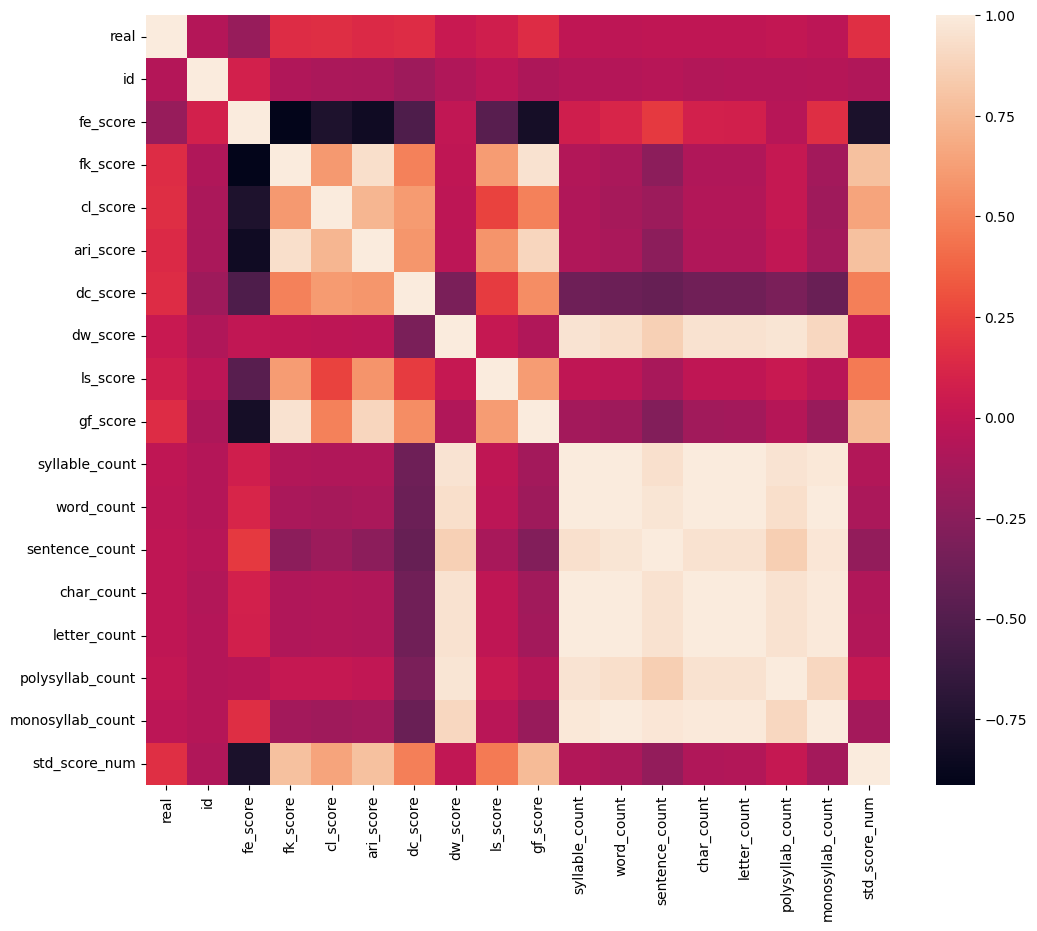

In [52]:
plt.subplots(figsize=(12,10))
sns.heatmap(News_df.corr());

In [53]:
'''
Of the test the Flesch Ease of Reading score seems to be the best predictor of whether an article is real news or not. 
'''

'\nOf the test the Flesch Ease of Reading score seems to be the best predictor of whether an article is real news or not. \n'

In [54]:
neg_read = News_df[News_df['fe_score']<0]
neg_read.reset_index(drop = True, inplace = True)
x = len(neg_read)
for i in range(x):
    print(neg_read['clean_text'][i])

in hillary s america  email server scrubs you  obama transfers his nobel peace prize to anti trump rioters  democrats blame hillary s criminal e mail server for her loss  demand it face prison  afraid of  dangerous  trump presidency  protesters pre emptively burn america down to the ground  clinton foundation in foreclosure as foreign donors demand refunds  hillary clinton blames youtube video for unexpected and spontaneous voter uprising that prevented her inevitable move into the white house  sudden rise in sea levels explained by disproportionately large tears shed by climate scientists in the aftermath of trump s electoral victory  fbi director comey delighted after receiving nobel prize for speed reading          emails in one week   u n  deploys troops to american college campuses in order to combat staggeringly low rape rates  responding to trump s surging poll numbers  obama preemptively pardons himself for treason  following hurricane matthew s failure to devastate florida  ac

In [55]:
'''I am going to drop these as well do to a lot of these having a lot of programming language left in'''

'I am going to drop these as well do to a lot of these having a lot of programming language left in'

In [56]:
News_df = News_df[News_df['fe_score']>0]
News_df.reset_index(drop = True, inplace = True)

In [57]:
neg_read

text  real          subject  \
0   In Hillary's America, email server scrubs you ...     0             None   
1   Illegal Immigrants Crossing The Border To Vote...     0             None   
2   Hillary at the Laugh Factory, Part 7: Loser Us...     0             None   
3   Clinton Camp Desperate, Russia Trains for WWII...     0             None   
4   In Hillary's America, email server scrubs you ...     0             None   
..                                                ...   ...              ...   
60  High school kids out of control? Noooo! We ve ...     0  Government News   
61  An unidentified black Trump supporter blasted ...     0        left-news   
62  Tennessee lawmakers have something to say to t...     0        left-news   
63  [vc_row][vc_column width= 1/1 ][td_block_trend...     0        left-news   
64  A scene straight from the Freddie Gray School ...     0        left-news   

                                                title  \
0                                                None   
1                                                None   
2                                                None   
3                                                None   
4                                                None   
..                                                ...   
60  BREAKING VIDEO: BRICKS AND ROCKS HURLED AT POL...   
61  WATCH: BLACK TRUMP SUPPORTER BLASTS CA City Co...   
62  HILARIOUS! TENNESSEE RESPONDS To California’s ...   
63                                           Homepage   
64  BREAKING: [VIDEO] Baltimore Thug Arrested Afte...   

                                                 date      id  fe_score  \
0                                                None   21586    -73.07   
1                                                None   22004    -44.57   
2                                                None   22398    -55.92   
3                                                None   22665    -45.48   
4                                                None   22717    -73.07   
..                                                ...     ...       ...   
60                                       Apr 27, 2015  122838    -82.61   
61                                       Aug 18, 2017  123567    -59.81   
62                                       Jun 27, 2017  123879    -55.55   
63  MSNBC HOST Rudely Assumes Steel Worker Would N...  124383     -5.68   
64                                       May 23, 2015  127153    -44.37   

    fk_score  cl_score  ari_score  ...            std_score  syllable_count  \
0       58.8     14.35       75.3  ...  58th and 59th grade            6789   
1       23.0     50.86       48.0  ...  11th and 12th grade             932   
2       52.2     14.30       66.8  ...  26th and 27th grade            6980   
3       23.4     49.87       47.5  ...  11th and 12th grade             936   
4       58.8     14.35       75.3  ...  58th and 59th grade            6790   
..       ...       ...        ...  ...                  ...             ...   
60      27.3     71.55       59.2  ...  10th and 11th grade             330   
61      45.5     24.79       59.9  ...  45th and 46th grade             768   
62      50.0     15.40       63.0  ...  49th and 50th grade             791   
63      20.5     33.07       38.5  ...  20th and 21st grade             115   
64      22.9     53.41       45.3  ...  10th and 11th grade             389   

    word_count  sentence_count char_count  letter_count  polysyllab_count  \
0         4271              30      23137         22434               594   
1          330              23       4364          3909                52   
2         4393              35      23756         23024               609   
3          334              22       4352          3901                49   
4         4272              30      23137         22434               594   
..         ...             ...        ...           ...               ...   
60         101

In [58]:
features = [feature for feature in News_df.columns if feature in column_names]

In [59]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'real', data=News_df, alpha=0.5)
        ax.set(xlabel=col, ylabel='fake/real')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

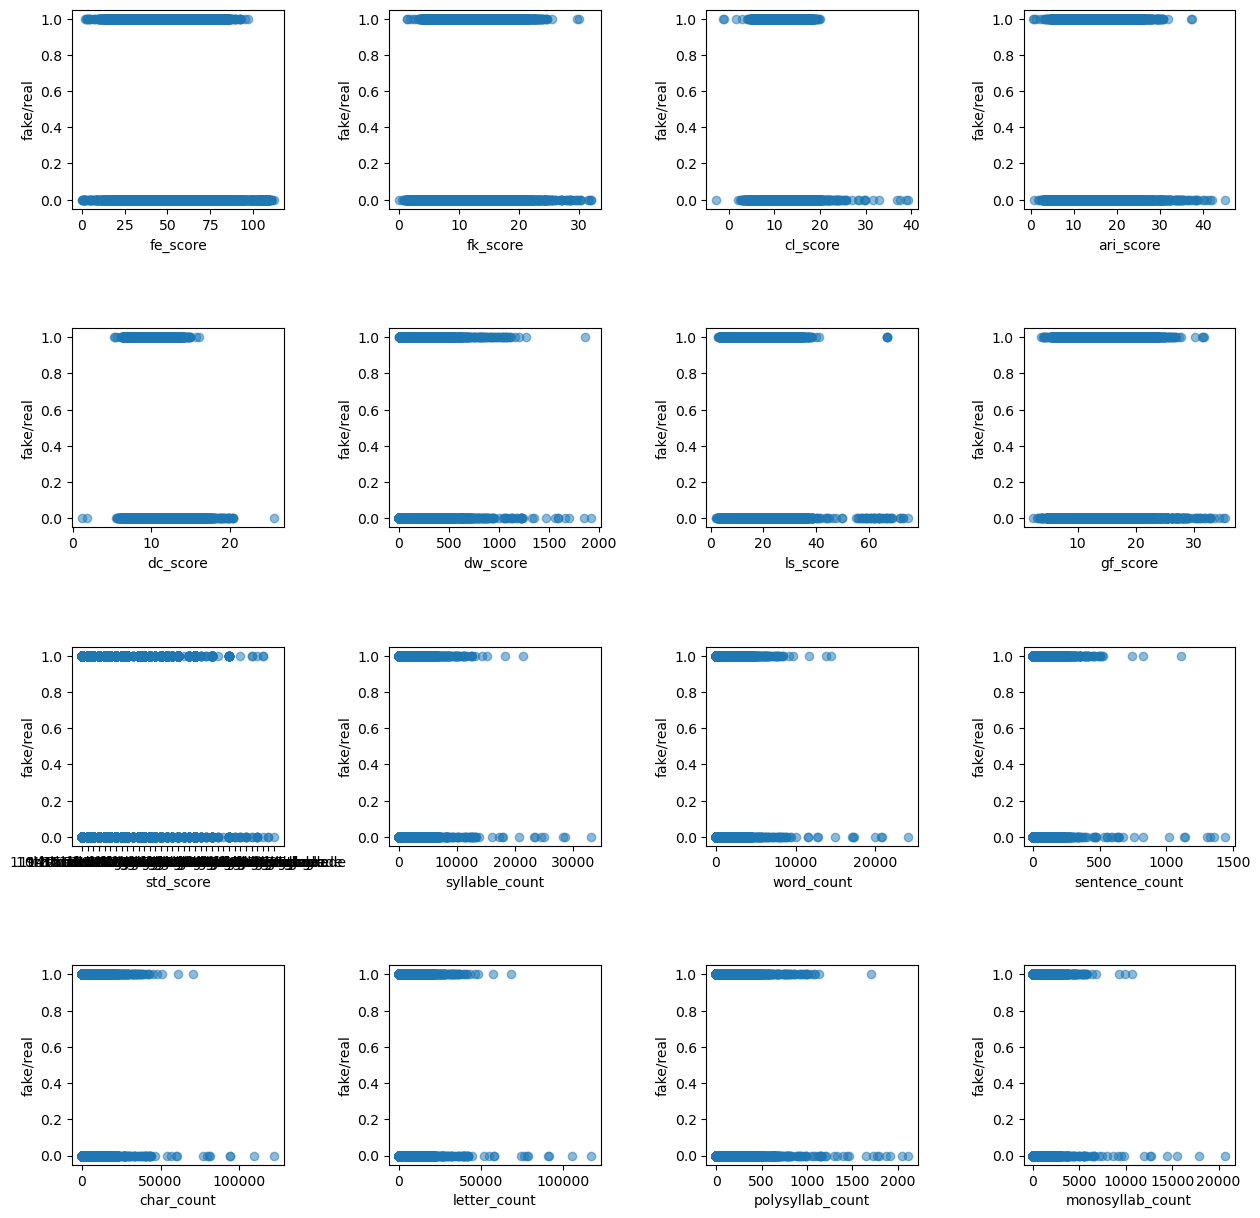

In [60]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [63]:
graph_columns = ['cl_score', 'ls_score']
features_graph = [feature for feature in News_df.columns if feature in graph_columns]

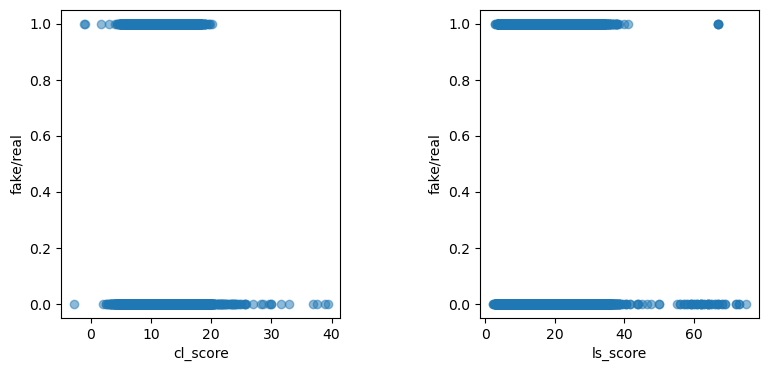

In [68]:

scatterplots(graph_columns, ncol=2, figsize=(9,4))

In [69]:
'''
It seems that there is only a little difference between the means of readability scores between fake and real news
but there seems to be much greater variability in fake news compared to real. In particular cl_score, dc_score
, and ls_score may be predictive 
'''

'\nIt seems that there is only a little difference between the means of readability scores between fake and real news\nbut there seems to be much greater variability in fake news compared to real. In particular cl_score, dc_score\n, and ls_score may be predictive \n'

In [70]:
News_df.describe()

real             id      fe_score      fk_score      cl_score  \
count  83339.000000   83339.000000  83339.000000  83339.000000  83339.000000   
mean       0.658599   78340.179304     55.424318     10.856071     11.475457   
std        0.474182   28264.278666     11.222427      2.571266      1.906103   
min        0.000000   21508.000000      0.090000      0.000000     -2.770000   
25%        0.000000   58012.500000     48.540000      9.200000     10.320000   
50%        1.000000   79337.000000     55.680000     10.700000     11.490000   
75%        1.000000  101210.500000     62.270000     12.300000     12.650000   
max        1.000000  128930.000000    112.290000     32.100000     39.360000   

          ari_score      dc_score      dw_score      ls_score      gf_score  \
count  83339.000000  83339.000000  83339.000000  83339.000000  83339.000000   
mean      13.368081      9.516123     92.005316     14.338805     12.341382   
std        3.145683      1.129374     82.517960      4.995684      2.585619   
min        0.600000      1.180000      0.000000      2.117647      2.360000   
25%       11.400000      8.800000     40.000000     11.166667     10.680000   
50%       13.200000      9.390000     74.000000     13.800000     12.150000   
75%       15.100000     10.060000    116.000000     16.750000     13.700000   
max       45.200000     25.690000   1922.000000     75.000000     35.410000   

       syllable_count    word_count  sentence_count     char_count  \
count    83339.000000  83339.000000    83339.000000   83339.000000   
mean       743.713088    489.310707       24.481311    2480.495338   
std        802.210097    542.293418       30.176186    2695.264132   
min         49.000000     41.000000        1.000000     150.000000   
25%        304.000000    200.000000        9.000000    1018.000000   
50%        578.000000    379.000000       18.000000    1926.000000   
75%        926.000000    604.000000       30.000000    3088.000000   
max      33075.000000  24135.000000     1442.000000  122086.000000   

        letter_count  polysyllab_count  monosyllab_count  std_score_num  
count   83339.000000      83339.000000      83339.000000   83339.000000  
mean     2400.792006         64.746433        324.027814      11.491205  
std      2598.252067         68.905574        376.571205       2.537848  
min       147.000000          0.000000         17.000000       0.500000  
25%       986.000000         25.000000        130.000000       9.500000  
50%      1870.000000         49.000000        245.000000      11.500000  
75%      2993.000000         82.000000        398.000000      12.500000  
max    117178.000000       2115.000000      20722.000000      34.500000

In [71]:
diff = News_df[News_df['dw_score']>1000]
diff.reset_index(drop = True, inplace = True)
x = len(diff)
for i in range(x):
    print(diff['text'][i])

References The Debate 
It started when Daniel Blatman, an Israeli historian and head of the Institute for Contemporary Jewry at the Hebrew University of Jerusalem, penned an op-ed for the Israeli daily Haaretz stating that ethnic cleansing “is exactly what happened in 1948.” To support this, Blatman cited Benny Morris: the Israeli historian, Blatman wrote, “determined that most of the Arabs in the country, over 400,000, were encouraged to leave or expelled in the first stage of the war—even before the Arab nations’ armies invaded.” [2] Benny Morris, October 30, 2007 ( Aude / CC BY-SA 2.0 ) 
That prompted a response from Morris, who wrote an op-ed of his own titled “Israel Conducted No Ethnic Cleansing in 1948”. In it, he contends that Blatman “distorts history when he says the new State of Israel, a country facing invading armies, carried out a policy of expelling the local Arabs.” And Blatman “betrayed his profession”, Morris further charged, “when he attributed to me things I have ne

In [ ]:
'These seeem fine'

In [72]:
many_wrd = News_df[News_df['word_count']> 5000]
many_wrd

text  real      subject  \
7      Yes, There Are Paid Government Trolls On Socia...     0         None   
83     Home / Badge Abuse / Parents on a Date Were As...     0         None   
191    References The Debate \nIt started when Daniel...     0         None   
213    Here is President Putin’s speech at Valdai Put...     0         None   
611    The List Of Establishment Republicans That Say...     0         None   
...                                                  ...   ...          ...   
82991  Patrick Henningsen 21st Century Wire The mains...     0  Middle-east   
83039   Patrick Henningsen 21st Century WireToday Ame...     0  Middle-east   
83116   Do roses know their thorns can hurt?    a quo...     0  Middle-east   
83149  Shawn Helton 21st Century WireThe 1994 cult fi...     0  Middle-east   
83184   Shawn Helton  21st Century WireOrlando s Puls...     0  Middle-east   

                                                   title                date  \
7                                                   None                None   
83                                                  None                None   
191                                                 None                None   
213                                                 None                None   
611                                                 None                None   
...                                                  ...                 ...   
82991  Washington Post Sloppy ‘Journalism’ Blames Rus...   November 26, 2016   
83039  Trump vs Clinton 2016: Mickey Mouse vs Cruella...    November 8, 2016   
83116  AN AMERICAN TRAGEDY: Who Really Killed JonBené...  September 23, 2016   
83149  CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...     August 13, 2016   
83184  ORLANDO ‘KNOWN WOLF’ Watched by FBI, Worked wi...       June 16, 2016   

           id  fe_score  fk_score  cl_score  ari_score  ...  \
7       21518     70.84       7.7      9.28        9.7  ...   
83      21664     72.76       6.9      7.94        7.7  ...   
191     21820     54.26      12.0     11.67       15.4  ...   
213     21854     61.46       9.2     10.10       10.5  ...   
611     22513     70.63       7.8      9.57       10.2  ...   
...       ...       ...       ...       ...        ...  ...   
82991  128580     41.84      14.7     12.83       17.8  ...   
83039  128628     57.50      10.7     10.73       12.9  ...   
83116  128706     56.18      11.2     11.38       13.9  ...   
83149  128739     42.75      14.3     12.48       17.3  ...   
83184  128774     42.55      14.4     12.89       17.7  ...   

                 std_score  syllable_count  word_count  sentence_count  \
7       9th and 10th grade            8509        5901             341   
83       7th and 8th grade            6805        5032             326   
191    11th and 12th grade           23183       15002             592   
213      8th and 9th grade           17291       11625             638   
611     9th and 10th grade           11407        7901             451   
...                    ...             ...         ...             ...   
82991  14th and 15th grade            9134        5723             196   
83039  10th and 11th grade            8375        5574             252   
83116  11th and 12th grade            8249        5405             231   
83149  14th and 15th grade           11492        7193             254   
83184  14th and 15th grade            8187        5050             177   

      char_count  letter_count  polysyllab_count  monosyllab_count  \
7          28159         27319               654              4227   
83         22881         22116               380              3755   
191        77170         74172              2051              9785   
213        56382         54819              1463              8025   
611        38433         36963               841              5638   
...          ...           ...               ...               ...   
82991 

In [73]:
News_df.to_pickle('News_df_scored')

In [75]:
30/17


1.7647058823529411

In [76]:
70/17

4.117647058823529

In [78]:
15437471/6976390

2.2128165139850267